## Importing Library

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Dropout

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
train_df = pd.read_csv('/content/crowd_sourced_balanced_dataset.csv')

In [ ]:
train_df.head()

,Post URL,Username,Post Text,Post Date,Post Time (HH:MM),Likes,Replies,Reposts,Shares,Verified User,Accessed Date,Accessed Time,Code,label,Post Time,Post Hour,Text Length
0,https://www.threads.net/@_md_sahed_hossain/pos...,_md_sahed_hossain,Breaking \nLove poet Sushant Pal has been the ...,7/13/2024,3:32,1.0,0.0,0.0,0.0,False,12/11/2024,1:04,C9WQ9dsyy6t,1,3:32:00,3.0,165.0
1,https://www.threads.net/@trinnitiemimihyovalti...,trinnitiemimihyovalti,Meanwhile in a land where unicorns dwell Libta...,11/22/2024,2:25,710.0,44.0,18.0,14.0,False,12/7/2024,0:27,DCqCSeguBG7,0,2:25:00,2.0,55.0
2,https://www.threads.net/@shuropriya_shur/post/...,shuropriya_shur,Sushant Pal has been the first to leaked the q...,7/13/2024,7:58,3.0,1.0,0.0,0.0,False,2/9/2025,22:02,C9WvbqIPKd9,1,7:58:00,7.0,248.0
3,NaN,NaN,Make California Great AgainElon Musk said he m...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
4,https://www.threads.net/@kellabeck/post/DCjakd...,acorkforkandpassport,How can women respect knowtheirvalue when Mik...,11/19/2024,4:13,1000.0,33.0,69.0,1.0,True,12/7/2024,2:26,DCjakdxuh0b,0,4:13:00,4.0,98.0


In [ ]:
print(train_df.columns)

Index(['Post URL', 'Username', 'Post Text', 'Post Date', 'Post Time (HH:MM)',
       'Likes', 'Replies', 'Reposts', 'Shares', 'Verified User',
       'Accessed Date', 'Accessed Time', 'Code', 'label', 'Post Time',
       'Post Hour', 'Text Length'],
      dtype='object')


## Data Preprocessing

In [ ]:
# Drop Nan Values
X = train_df.dropna()

# Get training data
X = train_df.drop('label', axis = 1)

#  Get target label
y = train_df['label']

## OneHot Representation

In [ ]:
messages = X.copy()


In [ ]:
messages.reset_index(inplace = True)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(messages.columns)

Index(['index', 'Post URL', 'Username', 'Post Text', 'Post Date',
       'Post Time (HH:MM)', 'Likes', 'Replies', 'Reposts', 'Shares',
       'Verified User', 'Accessed Date', 'Accessed Time', 'Code', 'Post Time',
       'Post Hour', 'Text Length'],
      dtype='object')


In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download stopwords if not already
nltk.download('stopwords')

# Initialize
ps = PorterStemmer()
vocab_size = 5000  # or another value depending on your dataset
maxlen = 100       # or any max length you want for padding

# Preprocessing
corpus = []
for i in range(len(train_df)):
    review = re.sub('[^a-zA-Z]', ' ', str(train_df['Post Text'].iloc[i]))
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Encoding and padding
encoded_docs = [one_hot(d, vocab_size) for d in corpus]
padded_docs = pad_sequences(encoded_docs, maxlen=maxlen, padding='post')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# vocabulray size
voc_size = 5000

In [ ]:
onehot_repr = [one_hot(words, voc_size) for words in corpus]
normal_repr = [(words, voc_size) for words in corpus]

In [ ]:
print("Normal Representation:",normal_repr[0][0])
print("One Hot Representation:",onehot_repr[0])

Normal Representation: break love poet sushant pal first leak question abe ali question name sushant pal list suppli
One Hot Representation: [2411, 4510, 4325, 3992, 3551, 2364, 4161, 4330, 3819, 4757, 4330, 2212, 3992, 3551, 1710, 981]


## Embedding Representation
#Constructing Transformer model
#Setup

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Implement multi head self attention as a keras layer

## Implement a Transformer block as a layer

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads, dropout_rate=rate)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation='relu'),
            layers.Dense(embed_dim)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, training=training)              # ✅ pass training
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, dropout_rate=0.1):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.dropout_rate = dropout_rate

        if embed_dim % num_heads != 0:
            raise ValueError(
                f"Embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )

        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

        self.dropout = layers.Dropout(dropout_rate)
        self.attention_dropout = layers.Dropout(dropout_rate)

    def attention(self, query, key, value, training=False):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        weights = self.attention_dropout(weights, training=training)
        output = tf.matmul(weights, value)
        return output

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs, training=False):
        batch_size = tf.shape(inputs)[0]
        query = self.separate_heads(self.query_dense(inputs), batch_size)
        key = self.separate_heads(self.key_dense(inputs), batch_size)
        value = self.separate_heads(self.value_dense(inputs), batch_size)

        attention = self.attention(query, key, value, training=training)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        output = self.combine_heads(concat_attention)
        return self.dropout(output, training=training)

## Implement Embedding Layer¶
Two seperate embedding layers, one for tokens, one for token index (positions).

In [ ]:
# class TokenAndPositionEmbedding(layers.Layer):
#     def __init__(self, maxlen, vocab_size, embed_dim):
#         super(TokenAndPositionEmbedding, self).__init__()
#         self.token_emb = layers.Embedding(input_dim = vocab_size, output_dim = embed_dim)
#         self.pos_emb = layers.Embedding(input_dim = maxlen, output_dim = embed_dim)

#     def call(self, x):
#         maxlen = tf.shape(x)[-1]
#         positions = tf.range(start=0, limit = maxlen, delta=1)
#         positions = self.pos_emb(positions)

#         x = self.token_emb(x)

#         return x + positions

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim, dropout_rate=0.1):  # ADD dropout_rate parameter
        super(TokenAndPositionEmbedding, self).__init__()
        self.maxlen = maxlen  # ADD: Store maxlen as instance variable
        self.vocab_size = vocab_size  # ADD: Store vocab_size
        self.embed_dim = embed_dim  # ADD: Store embed_dim

        # ADD mask_zero=True to handle padding tokens properly
        self.token_emb = layers.Embedding(
            input_dim=vocab_size,
            output_dim=embed_dim,
            mask_zero=True  # This helps with padding
        )
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

        # ADD dropout for regularization
        self.dropout = layers.Dropout(dropout_rate)

    def call(self, x, training=False):  # ADD training parameter
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)

        x = self.token_emb(x)

        # ADD: Apply dropout to the combined embeddings
        combined = x + positions
        combined = self.dropout(combined, training=training)

        return combined

    # ADD: Optional method to get config (helpful for model saving/loading)
    def get_config(self):
        config = super().get_config()
        config.update({
            'maxlen': self.maxlen,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim,
        })
        return config

## Create Classifier model using Transfomer layer¶
Transformer layer outputs one vector for each time step of our input sequence. Here, we take the mean across all time steps and use a feed forward network on top of it to classify text

In [ ]:
# # making all sentences of same length
# maxlen = 20

# # vocabulray size
# vocab_size = 5000

# embedded_docs = pad_sequences(onehot_repr, padding = 'pre', maxlen = maxlen)#

# CHANGE 1: Increase maxlen - 20 is too short for news articles
maxlen = 100  # CHANGED from 20 to 100 (or even 200 for longer articles)

# CHANGE 2: Increase vocab_size for better word coverage
vocab_size = 10000  # CHANGED from 5000 to 10000

# CHANGE 3: Use 'post' padding instead of 'pre' for better performance
embedded_docs = pad_sequences(onehot_repr, padding='post', maxlen=maxlen)  # CHANGED padding to 'post'

# BETTER APPROACH: Add truncation parameter
embedded_docs = pad_sequences(
    onehot_repr,
    padding='post',      # CHANGED: 'post' works better with transformers
    truncating='post',   # ADD: Truncate from end if sequence is too long
    maxlen=maxlen
)

# OPTIONAL: Check your data statistics first
print(f"Original sequence lengths:")
sequence_lengths = [len(seq) for seq in onehot_repr]
print(f"Mean length: {np.mean(sequence_lengths):.1f}")
print(f"Max length: {max(sequence_lengths)}")
print(f"Min length: {min(sequence_lengths)}")
print(f"95th percentile: {np.percentile(sequence_lengths, 95):.1f}")

# RECOMMENDATION: Set maxlen based on your data
# Use 95th percentile or mean + 2*std to capture most sequences
recommended_maxlen = int(np.percentile(sequence_lengths, 95))
print(f"Recommended maxlen: {recommended_maxlen}")

# FINAL IMPROVED VERSION:
maxlen = min(max(recommended_maxlen, 50), 200)  # Between 50-200 tokens
vocab_size = 10000  # Increased vocabulary

embedded_docs = pad_sequences(
    onehot_repr,
    padding='post',
    truncating='post',
    maxlen=maxlen,
    value=0  # Explicit padding value
)

print(f"Final embedded_docs shape: {embedded_docs.shape}")
print(f"Using maxlen: {maxlen}, vocab_size: {vocab_size}")

# VERIFY: Check if you're losing information
original_nonzero = sum(len([x for x in seq if x != 0]) for seq in onehot_repr)
padded_nonzero = np.count_nonzero(embedded_docs)
print(f"Information retention: {padded_nonzero/original_nonzero:.2%}")

Original sequence lengths:
Mean length: 16.9
Max length: 107
Min length: 0
95th percentile: 40.0
Recommended maxlen: 40
Final embedded_docs shape: (6348, 50)
Using maxlen: 50, vocab_size: 10000
Information retention: 99.19%


In [ ]:
print("One Hot Representation:",onehot_repr[0])
print("Padding:",embedded_docs[0])

One Hot Representation: [2411, 4510, 4325, 3992, 3551, 2364, 4161, 4330, 3819, 4757, 4330, 2212, 3992, 3551, 1710, 981]
Padding: [2411 4510 4325 3992 3551 2364 4161 4330 3819 4757 4330 2212 3992 3551
 1710  981    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
from tensorflow.keras import layers, regularizers

# SIMPLIFIED & REGULARIZED HYPERPARAMETERS
embed_dim = 40       # Reduced from 64
num_heads = 4        # Reduced from 8
ff_dim = 64          # Reduced from 128
dropout_rate_1 = 0.5
dropout_rate_2 = 0.3
l2_reg = 0.001

# MODEL DEFINITION
inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim, dropout_rate=dropout_rate_2)
x = embedding_layer(inputs)

transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, rate=dropout_rate_2)
x = transformer_block(x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(dropout_rate_1)(x)
x = layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = layers.Dropout(dropout_rate_2)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ token_and_position_embedding_2  │ (None, 20, 64)         │       321,280 │
│ (TokenAndPositionEmbedding)     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_2             │ (None, 20, 64)         │        33,472 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,413 (1.36 MB)

 Trainable params: 355,413 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

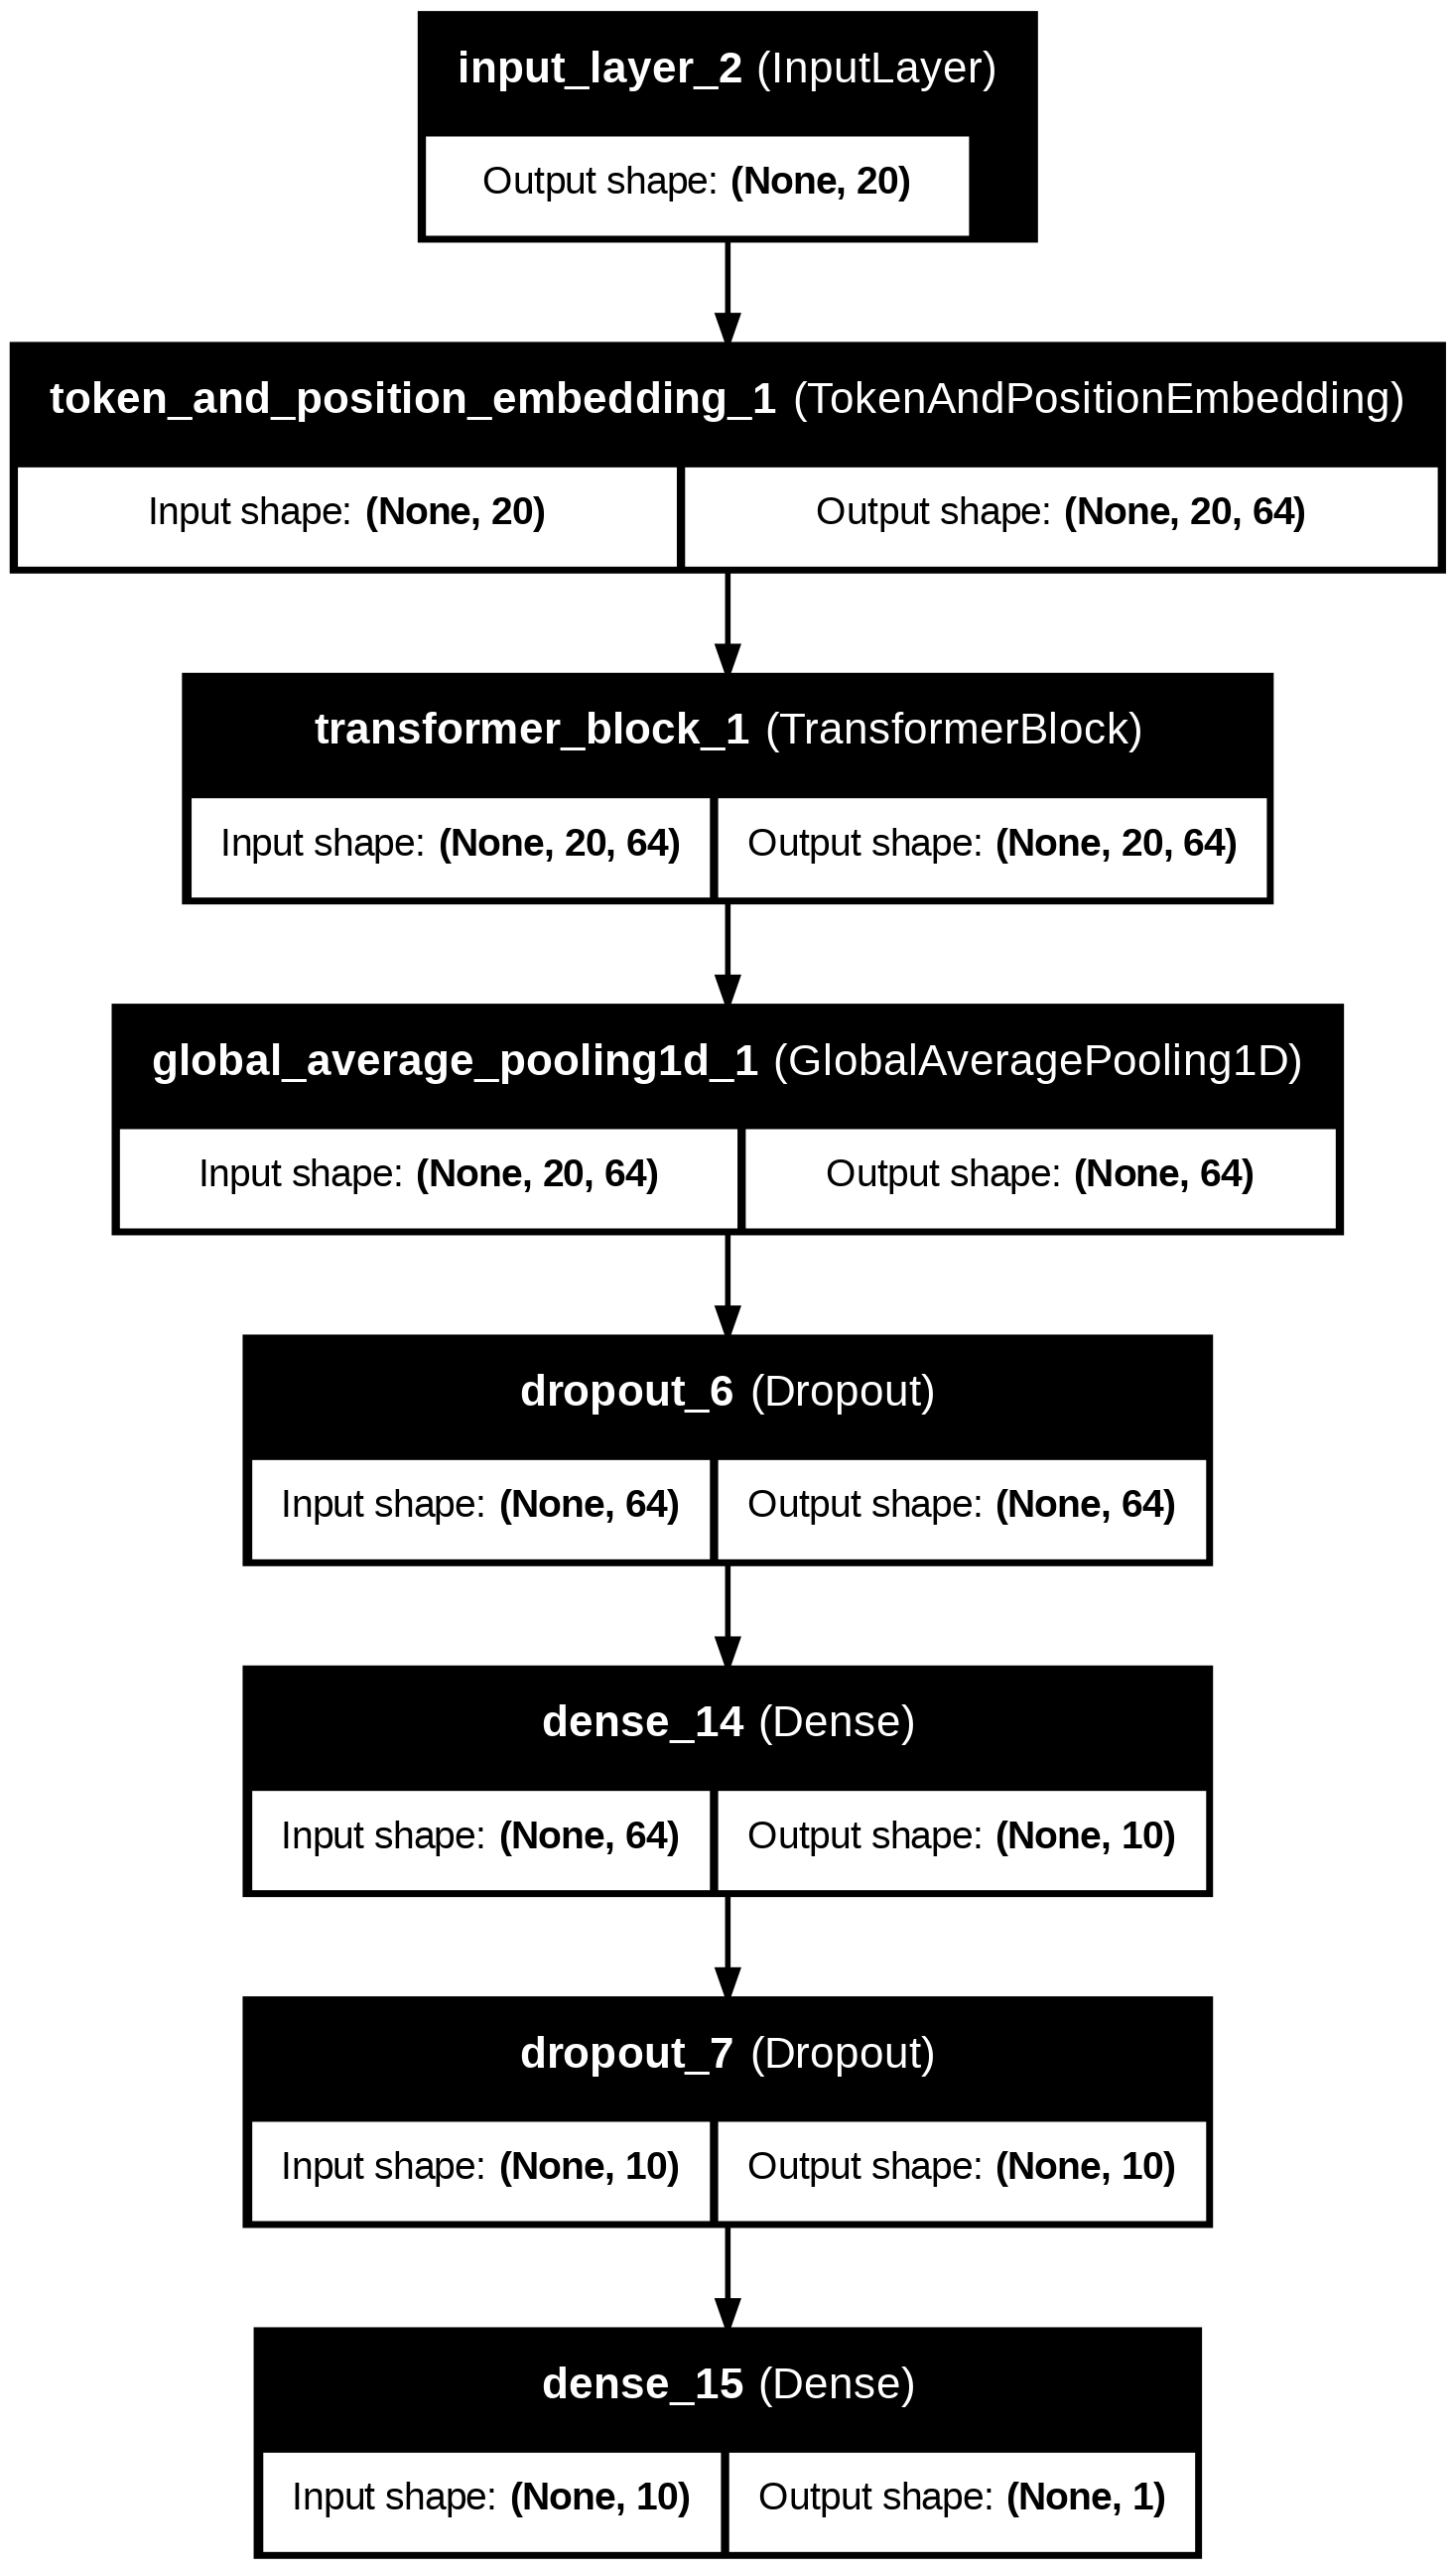

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.decomposition import PCA

print("Applying PCA before t-SNE...")
pca = PCA(n_components=10)  # Must be ≤ 10
features_pca = pca.fit_transform(features)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)
tsne_results = tsne.fit_transform(features_pca)


Applying PCA before t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6348 samples in 0.010s...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 6348 samples in 0.652s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6348
[t-SNE] Computed conditional probabilities for sample 2000 / 6348
[t-SNE] Computed conditional probabilities for sample 3000 / 6348
[t-SNE] Computed conditional probabilities for sample 4000 / 6348
[t-SNE] Computed conditional probabilities for sample 5000 / 6348
[t-SNE] Computed conditional probabilities for sample 6000 / 6348
[t-SNE] Computed conditional probabilities for sample 6348 / 6348
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.286736
[t-SNE] KL divergence after 1000 iterations: 1.224948


Model layer structure:
Layer 0: input_layer_2 - InputLayer
Layer 1: token_and_position_embedding_1 - TokenAndPositionEmbedding
Layer 2: transformer_block_1 - TransformerBlock
Layer 3: global_average_pooling1d_1 - GlobalAveragePooling1D
Layer 4: dropout_6 - Dropout
Layer 5: dense_14 - Dense
Layer 6: dropout_7 - Dropout
Layer 7: dense_15 - Dense
Extracting features...
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Features shape: (6348, 10)
Applying t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6348 samples in 0.011s...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 6348 samples in 0.518s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6348
[t-SNE] Computed conditional probabilities for sample 2000 / 6348
[t-SNE] Computed conditional probabilities for sample 3000 / 6348
[t-SNE] Computed conditional probabilities for sample 4000 / 6348
[t-SNE] Computed conditional probabilities for sample 5000 / 6348
[t-SNE] Computed conditional probabilities for sample 6000 / 6348
[t-SNE] Computed conditional probabilities for sample 6348 / 6348
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.270752
[t-SNE] KL divergence after 1000 iterations: 1.232331


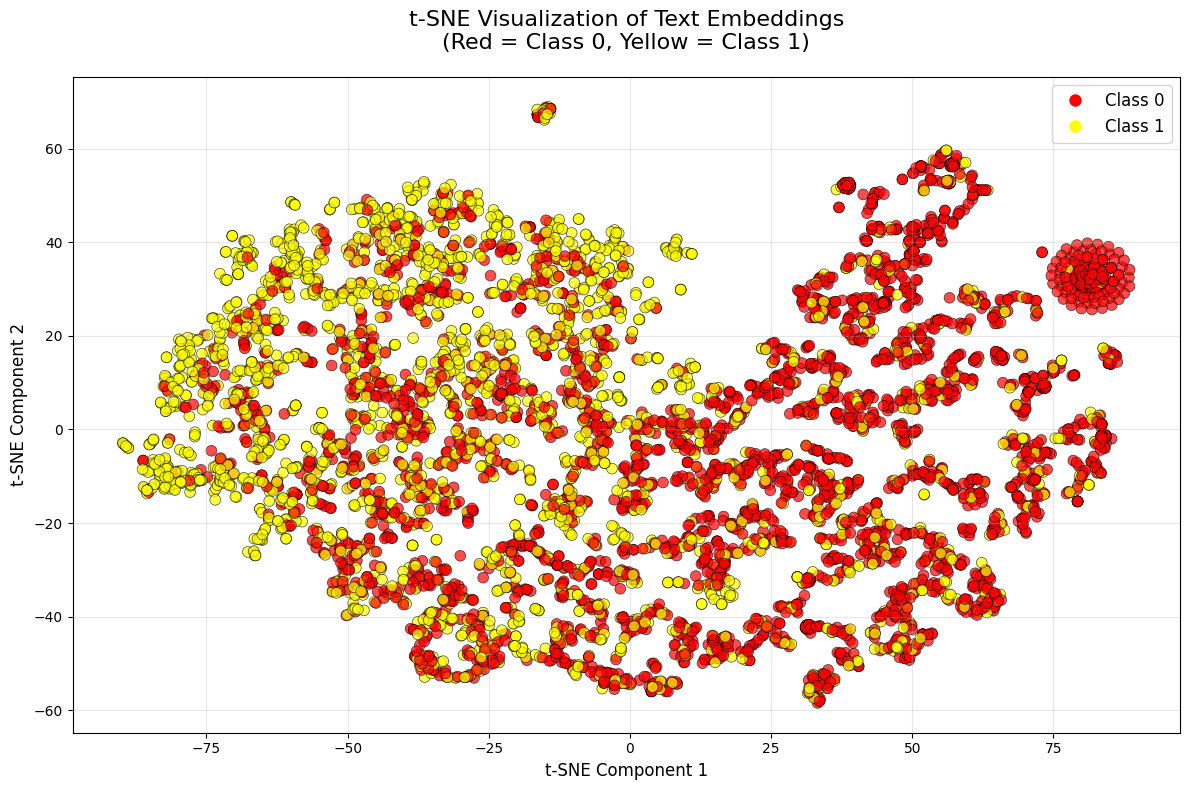

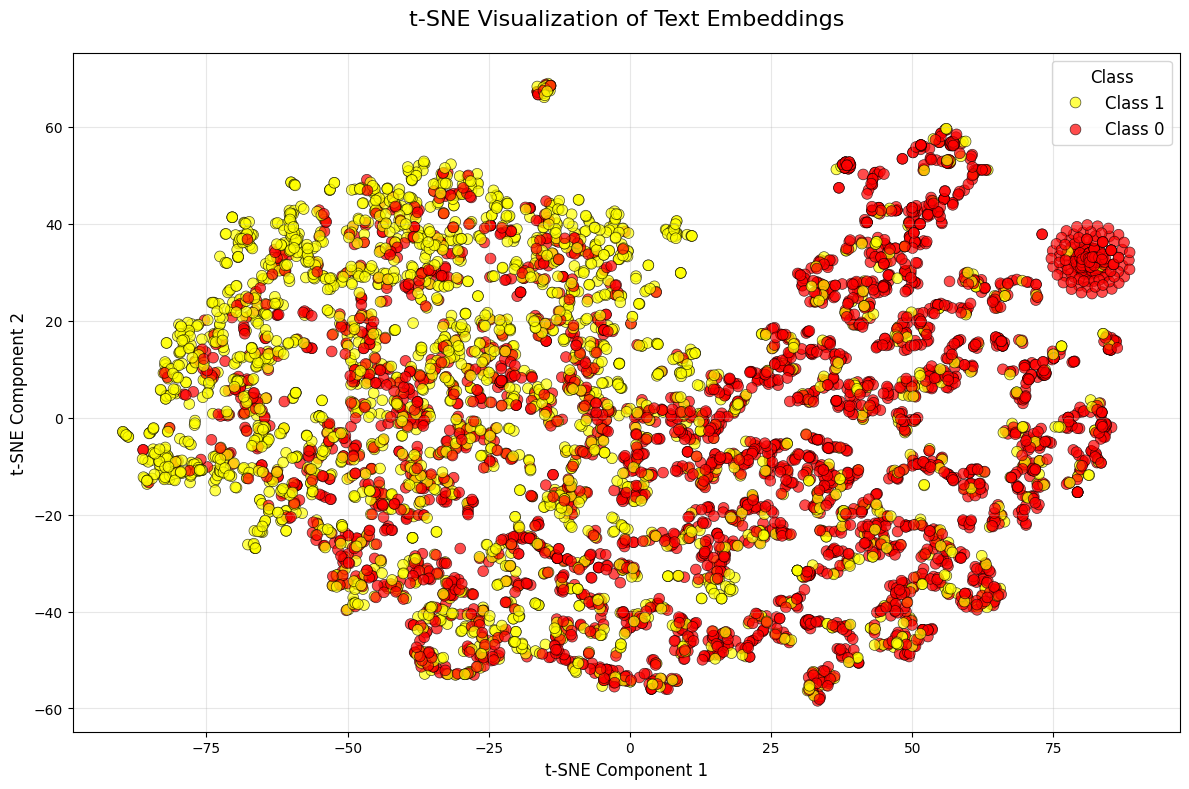


Dataset Statistics:
Total samples: 6348
Class 0 samples: 3710
Class 1 samples: 2638
Feature dimension: 10
t-SNE perplexity used: 30


In [ ]:
# Install required libraries
!pip install scikit-learn matplotlib seaborn

# Imports
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# (Optional) Train the model
# model.fit(padded_docs, y, batch_size=32, epochs=5, validation_split=0.2)

# Extract 10D features from second last layer
feature_extractor = tf.keras.Model(inputs=model.input,
                                   outputs=model.layers[-2].output)

# Sanity check: print model layers
print("Model layer structure:")
for i, layer in enumerate(model.layers):
    print(f"Layer {i}: {layer.name} - {layer.__class__.__name__}")

# Extract features
print("Extracting features...")
features = feature_extractor.predict(padded_docs)
print(f"Features shape: {features.shape}")

# Apply t-SNE
print("Applying t-SNE...")
tsne = TSNE(n_components=2,
            perplexity=30,
            n_iter=1000,
            random_state=42,
            verbose=1)

tsne_results = tsne.fit_transform(features)

# Convert labels to colors
colors = ['red' if label == 0 else 'yellow' for label in y]

# Matplotlib Scatter Plot
plt.figure(figsize=(12, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
            c=colors, alpha=0.7, s=60, edgecolors='black', linewidth=0.5)

plt.title('t-SNE Visualization of Text Embeddings\n(Red = Class 0, Yellow = Class 1)',
          fontsize=16, pad=20)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)

# Legend
# Add legend manually with correct syntax
handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor='red', markersize=10, label='Class 0'),
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor='yellow', markersize=10, label='Class 1')
]
plt.legend(handles=handles, loc='upper right', fontsize=12)


plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Seaborn Scatter Plot
plt.figure(figsize=(12, 8))

df_tsne = pd.DataFrame({
    'TSNE_1': tsne_results[:, 0],
    'TSNE_2': tsne_results[:, 1],
    'Class': ['Class 0' if label == 0 else 'Class 1' for label in y]
})

sns.scatterplot(data=df_tsne, x='TSNE_1', y='TSNE_2', hue='Class',
                palette={'Class 0': 'red', 'Class 1': 'yellow'},
                alpha=0.7, s=60, edgecolor='black', linewidth=0.5)

plt.title('t-SNE Visualization of Text Embeddings', fontsize=16, pad=20)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Class', fontsize=12, title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Dataset Stats
print(f"\nDataset Statistics:")
print(f"Total samples: {len(y)}")
print(f"Class 0 samples: {np.sum(np.array(y) == 0)}")
print(f"Class 1 samples: {np.sum(np.array(y) == 1)}")
print(f"Feature dimension: {features.shape[1]}")
print(f"t-SNE perplexity used: {tsne.perplexity}")


In [ ]:
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

from tensorflow.keras.optimizers import Adam

# Use Adam optimizer with a smaller learning rate
optimizer = Adam(learning_rate=0.0005)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Splitting Data into train and test

In [ ]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

## Model Training


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.6151 - loss: 0.6725 - val_accuracy: 0.7803 - val_loss: 0.4840
Epoch 2/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7893 - loss: 0.4986 - val_accuracy: 0.8441 - val_loss: 0.3868
Epoch 3/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8504 - loss: 0.4058 - val_accuracy: 0.8772 - val_loss: 0.3626
Epoch 4/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8886 - loss: 0.3238 - val_accuracy: 0.8835 - val_loss: 0.3657
Epoch 5/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9236 - loss: 0.2398 - val_accuracy: 0.8945 - val_loss: 0.2898
Epoch 6/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9314 - loss: 0.2234 - val_accuracy: 0.8969 - val_loss: 0.3338
Epoch 7/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9461 - loss: 0.1902 - val_accuracy: 0.9039 - val_loss: 0.3319
Epoch 8/30
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9626 - loss: 0.1380 - val_accuracy: 

## Visualizing Train,Test - Accuracy,Loss

In [ ]:
model.history.history

{'accuracy': [0.7018511295318604,
  0.8499408960342407,
  0.9037022590637207,
  0.9318629503250122,
  0.9558881521224976,
  0.9743993878364563,
  0.9824734330177307,
  0.9856242537498474,
  0.9879873991012573,
  0.9893658757209778],
 'loss': [0.5670771598815918,
  0.36842700839042664,
  0.2666687071323395,
  0.1935274600982666,
  0.13133150339126587,
  0.08074736595153809,
  0.05767268314957619,
  0.04329506680369377,
  0.04168703407049179,
  0.031074322760105133],
 'val_accuracy': [0.8102362155914307,
  0.8551180958747864,
  0.8999999761581421,
  0.9007874131202698,
  0.9070866107940674,
  0.9102362394332886,
  0.8999999761581421,
  0.9070866107940674,
  0.9047244191169739,
  0.9023622274398804],
 'val_loss': [0.46439799666404724,
  0.3344448506832123,
  0.27269816398620605,
  0.25121447443962097,
  0.2658885419368744,
  0.28671056032180786,
  0.3930487632751465,
  0.33238959312438965,
  0.3774455785751343,
  0.4987410008907318]}

In [ ]:
y_pred_prob = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step


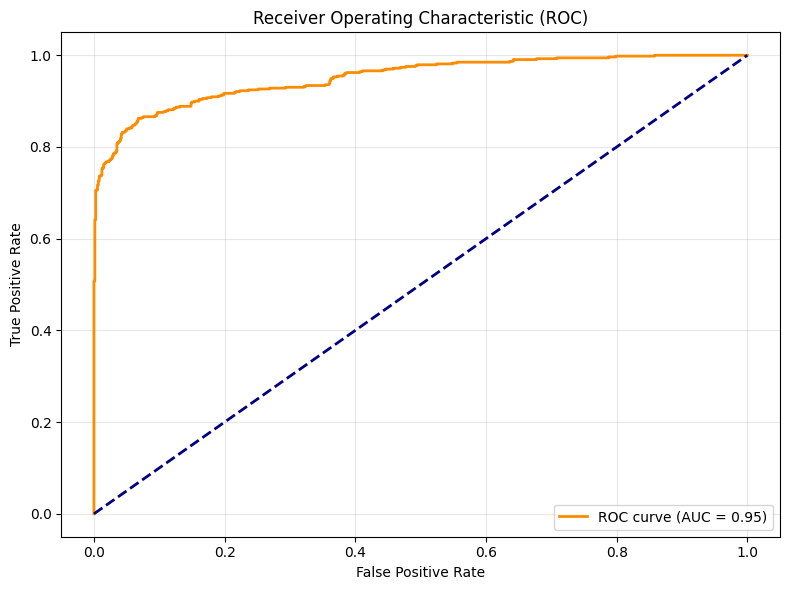

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("roc_curve.png", dpi=300)
plt.show()


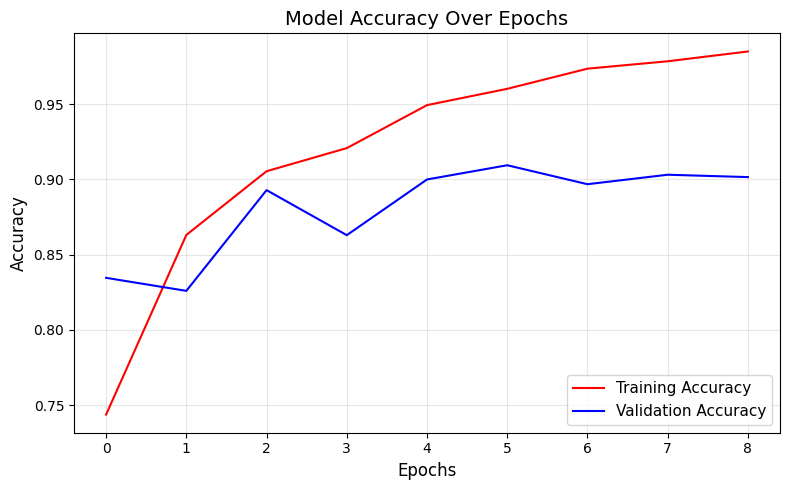

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, 'r-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right', fontsize=11)
plt.tight_layout()
plt.savefig('accuracy_plot.png', dpi=300)  # High-res for paper
plt.show()

In [ ]:
# Load your test data from the created test.csv
test_df = pd.read_csv('/content/test.csv')

# Apply the return_x_y function to preprocess the test data
X_test, X_test_drop = return_x_y(test_df)

In [ ]:
y_pred_test = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [ ]:
# # Train the model and save the training history
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=10,
#     batch_size=32
# )


from tensorflow.keras.callbacks import EarlyStopping

# Add EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Increase epochs
    batch_size=32,
    callbacks=[early_stopping]  # Add EarlyStopping callback
)



# Convert the training history to a DataFrame
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df['Epoch'] = range(1, len(history_df) + 1)

# Show the training and validation accuracy over epochs
print("Accuracy over epochs:")
print(history_df[['Epoch', 'accuracy', 'val_accuracy']])

# ================================
# Precision, Recall, F1 Report
# ================================
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) if y_pred_probs.shape[1] > 1 else (y_pred_probs > 0.5).astype("int32")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Calculate and print accuracy, precision, recall, and F1 score explicitly
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Extract precision, recall, and F1 from the classification report
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'], output_dict=True)
precision = report['Positive']['precision']
recall = report['Positive']['recall']
f1_score = report['Positive']['f1-score']

print(f"Precision (Positive): {precision:.4f}")
print(f"Recall (Positive): {recall:.4f}")
print(f"F1 Score (Positive): {f1_score:.4f}")

Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9936 - loss: 0.0306 - val_accuracy: 0.8685 - val_loss: 0.5546
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9924 - loss: 0.0340 - val_accuracy: 0.8685 - val_loss: 0.5501
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9913 - loss: 0.0392 - val_accuracy: 0.8953 - val_loss: 0.6584
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9940 - loss: 0.0318 - val_accuracy: 0.8984 - val_loss: 0.6709
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9921 - loss: 0.0355 - val_accuracy: 0.9024 - val_loss: 0.6372
Accuracy over epochs:
   Epoch  accuracy  val_accuracy
0      1  0.991138      0.868504
1      2  0.990154      0.868504
2      3  0.991138      0.895276
3      4  0.993501      0.898425
4      5  0.992714      0.902362
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.9

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


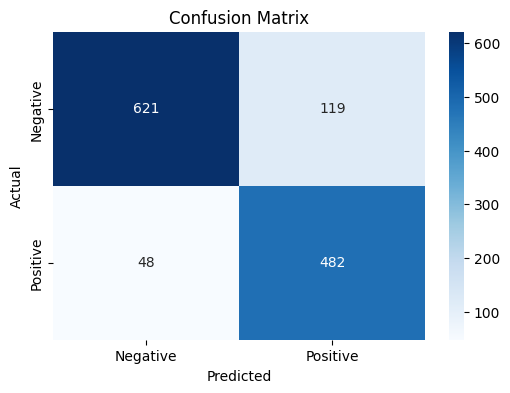

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
import seaborn as sns

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

